In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
file_path = r"C:\Users\HP\Documents\mishamaamdataset.xlsx"  
data = pd.read_excel(file_path)

In [4]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
      AGE  INCOME STUDENT    Credit  purchase
0   young    high      no       fair       no
1   young    high      no  excellent       no
2  middle    high      no       fair      yes
3  senior  medium      no       fair      yes
4  senior     low     yes       fair      yes


In [5]:
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [6]:
print("\nEncoded Dataset:")
print(data.head())


Encoded Dataset:
   AGE  INCOME  STUDENT  Credit   purchase
0    2       0        0        1         0
1    2       0        0        0         0
2    0       0        0        1         1
3    1       2        0        1         1
4    1       1        1        1         1


In [7]:
X = data.drop("purchase", axis=1)  
y = data["purchase"]               

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [9]:
clf = DecisionTreeClassifier(random_state=42)

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 60.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



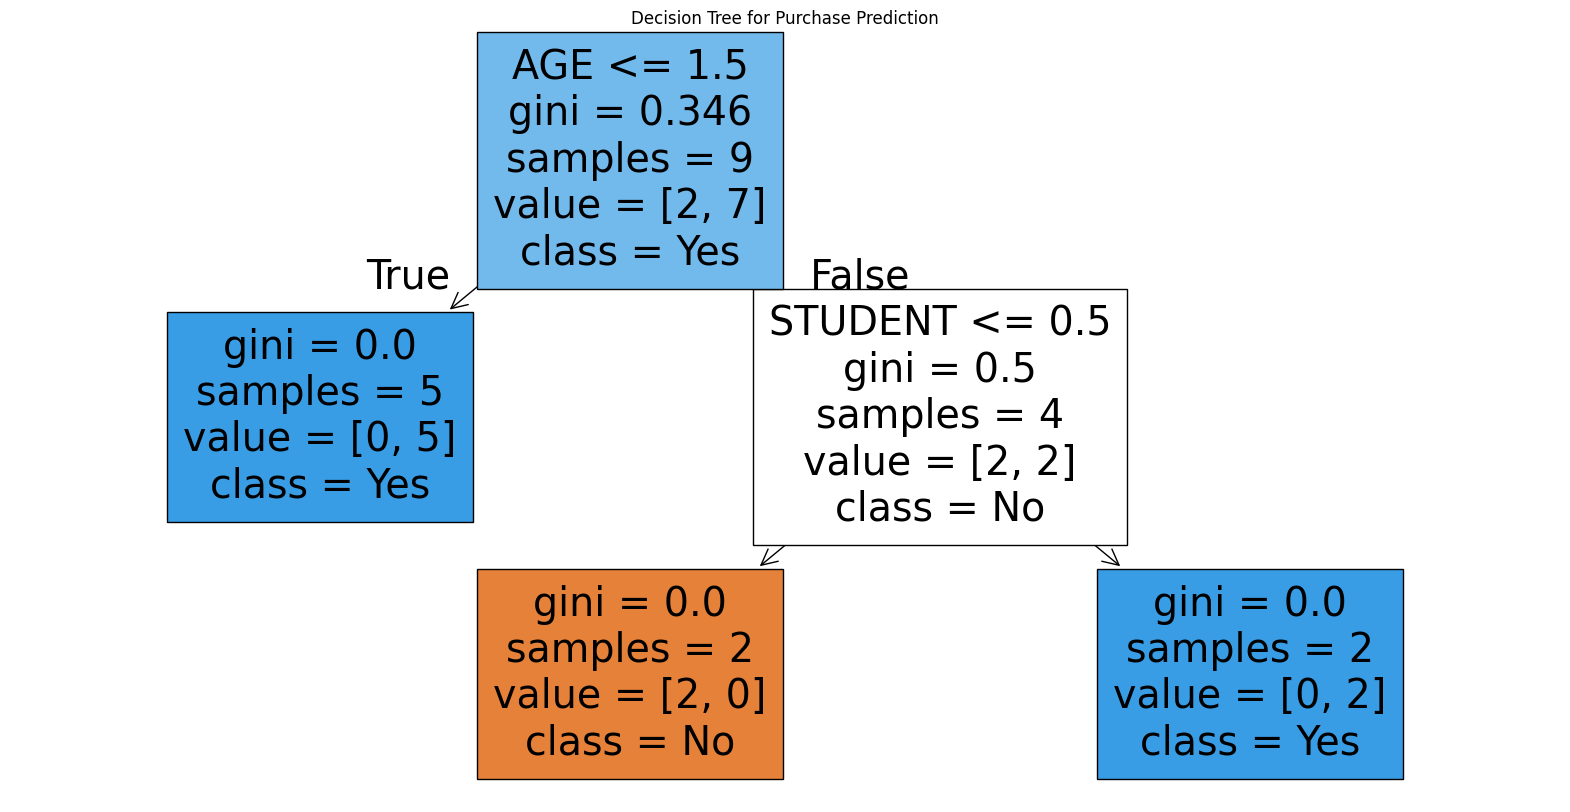

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree for Purchase Prediction")
plt.show()